In [ ]:
!pip install keras_metrics owlready2 fasttext

# Création fichier paires négatives


In [ ]:
def nettoyer_unicode(c):
    liste_codes =  {
        'Ã\xa0': 'à',
        'Ã€': 'À',
        'Ã¢': 'â',
        'ã': 'â',
        'Ã‚': 'Â',
        'Ã©': 'é',
        'Ã©': 'é',
        'ã‰': 'é',
        'ãƒâ©': 'é',
        'Ã\x89': 'É',
        'Ã\xa8': 'è',
        'Ã\xaa': 'ê',
        'Ã\x8a': 'Ê', 
        'Ã¨': 'ê',       
        'Ã«': 'ë',
        'Ã®':'î',
        'Ã\x8e':'Î',        
        'Ã¯': 'ï', 
        'Ã´': 'ô',
        'Ã\x94': 'Ô',
        'Ã¹': 'ù', 
        'Ã»': 'û',
        'Å\x93': 'œ', 
        'Â«': '«',
        'Â»': '»',
        'Ã§': 'ç',
        'Ã\x87': 'Ç',
        'Âº': 'º',
        'â€™': '’',
        'â\x80\x99': '’',
        'â\x80\xa6' : '…',
    }
    
    for code in liste_codes:
        c = c.replace(code,liste_codes[code])
    return c

In [ ]:
import numpy as np
from sklearn.utils import shuffle

#Paires positives
# paires_pos = np.load("/content/drive/My Drive/Colab Notebooks/paires_pos.npy", allow_pickle = True)
paires_pos = np.load("Desktop/paires_pos.npy", allow_pickle = True)

#Paires negatives
# paires_neg = np.load("/content/drive/My Drive/Colab Notebooks/paires_neg.npy", allow_pickle = True)
paires_neg = np.load("Desktop/paires_neg.npy", allow_pickle = True)

print(len(paires_pos), "paires positives")
print(len(paires_neg), "paires negatives")

#training
rand_pos_indices = np.random.choice(paires_pos.shape[0], 8250, replace=False)
training_data_pos = paires_pos[rand_pos_indices]
rand_neg_indices = np.random.choice(paires_neg.shape[0], 8250, replace=False)
training_data_neg = paires_neg[rand_neg_indices]

#training data
# formatter en X et Y pour CNN
id = []
titre1 = []
titre2 = []
for pair in training_data_neg:
  id.append(0)
  titre1.append(nettoyer_unicode(pair[0].lower()))
  titre2.append(nettoyer_unicode(pair[1].lower()))
for pair in training_data_pos:
  id.append(1)
  titre1.append(nettoyer_unicode(pair[0].lower()))
  titre2.append(nettoyer_unicode(pair[1].lower()))
train_data = shuffle(titre1, titre2, id)

#test
#get remaining pairs
remaining_pos_indices = np.array([x for x in np.arange(paires_pos.shape[0]) if not np.isin(x, rand_pos_indices)])
remaining_neg_indices = np.array([x for x in np.arange(paires_neg.shape[0]) if not np.isin(x, rand_neg_indices)])
remaining_pos = paires_pos[remaining_pos_indices]
remaining_neg = paires_neg[remaining_neg_indices]

#sélection aléatoire 500 paires positives et négatives
test_indices_pos = np.random.choice(remaining_pos.shape[0], 500, replace=False)
test_data_pos = remaining_pos[test_indices_pos]
test_indices_neg = np.random.choice(remaining_neg.shape[0], 500, replace=False)
test_data_neg = remaining_neg[test_indices_neg]

id = []
titre1 = []
titre2 = []
for pair in test_data_neg:
  id.append(0)
  titre1.append(nettoyer_unicode(pair[0].lower()))
  titre2.append(nettoyer_unicode(pair[1].lower()))
for pair in test_data_pos:
  id.append(1)
  titre1.append(nettoyer_unicode(pair[0].lower()))
  titre2.append(nettoyer_unicode(pair[1].lower()))
test_data = shuffle(titre1, titre2, id)


8950 paires positives
95882 paires negatives


Récupérer FastText

On réalise la tokenisation du texte

In [ ]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(filters=',"!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\'' )
tokenizer.fit_on_texts(train_data[0] + train_data[1])

len_seq = 150
len_dict = len(tokenizer.word_counts) + 1
print(tokenizer.word_index)

#training data
train_data[0] = pad_sequences(tokenizer.texts_to_sequences(train_data[0]), maxlen=len_seq)
train_data[1] = pad_sequences(tokenizer.texts_to_sequences(train_data[1]), maxlen=len_seq)
print(train_data[0])
#concatenate word vectors
conc = []
for index, val in enumerate(train_data[0]):
  conc.append(np.concatenate([train_data[0][index], train_data[1][index]]))
train_data.append(conc)

#testing data
test_data[0] = pad_sequences(tokenizer.texts_to_sequences(test_data[0]), maxlen=len_seq)
test_data[1] = pad_sequences(tokenizer.texts_to_sequences(test_data[1]), maxlen=len_seq)

#concatenate word vectors
conc = []
for index, val in enumerate(test_data[0]):
  conc.append(np.concatenate([test_data[0][index], test_data[1][index]]))
test_data.append(conc)


{'de': 1, 'la': 2, 'le': 3, 'les': 4, 'l': 5, 'du': 6, 'des': 7, 'tome': 8, 'et': 9, 'd': 10, 'un': 11, 'à': 12, '2': 13, '1': 14, 'une': 15, 'au': 16, 'en': 17, '3': 18, 'nº': 19, 'dans': 20, 'est': 21, 'vie': 22, 'histoires': 23, 'pour': 24, 'nâ°': 25, 'nuit': 26, 'caillou': 27, 'monde': 28, 'mon': 29, 'secret': 30, 'histoire': 31, 'temps': 32, 'sur': 33, 'amour': 34, 'grand': 35, 'pas': 36, '4': 37, 'livre': 38, 'ma': 39, 'coeur': 40, 'enfants': 41, 'petite': 42, 'maison': 43, 'silence': 44, 'ombre': 45, 'je': 46, 'petit': 47, 'a': 48, 'moi': 49, 'autres': 50, 'c': 51, 'homme': 52, 'rouge': 53, 'qui': 54, 'mémoire': 55, 'québec': 56, 'garfield': 57, 'aux': 58, 'avec': 59, 'volume': 60, 'guerre': 61, 'fille': 62, 'poèmes': 63, 'grande': 64, 'filles': 65, 'bonheur': 66, 'dernier': 67, 'ou': 68, 'il': 69, 'mots': 70, 't': 71, 'autre': 72, 'trois': 73, 'contes': 74, 'père': 75, 'monsieur': 76, 'chemins': 77, 'tout': 78, 'lumière': 79, 'rose': 80, 'noël': 81, 'mes': 82, '5': 83, 'terre':


On va maintenant utiliser Glove pour définir les embeddings

In [ ]:
import io
import os
import numpy as np

# word vectors
print('Computing weights')
dictionnary = {}
fin = io.open('Desktop/glove.840B.300d.txt', 'r', encoding='utf-8', newline='\n', errors='ignore')
# n, d = map(int, fin.readline().split())
for line in fin:
    tokens = line.rstrip().split(' ')
    dictionnary[tokens[0]] = np.asarray(tokens[1:], dtype='float32')

m_embedding = np.zeros((len(tokenizer.word_counts) + 1, 300))
count = 0
for word, index in tokenizer.word_index.items():
  if word in dictionnary:
    m_embedding[index] = dictionnary[word]
  else:
    count += 1
    # print('pas dans glove: {}'.format(word))
print(count)

Computing weights
3417


Création du modèle

In [ ]:
import pandas as pd
from sklearn.utils import shuffle
import numpy as np
from time import time
import tensorflow.keras as keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, BatchNormalization, Bidirectional
from keras.layers import AveragePooling1D, Conv1D, Embedding, LSTM
from keras_metrics import precision, recall, f1_score, binary_precision, binary_f1_score, binary_recall
from keras.callbacks import EarlyStopping, ModelCheckpoint
from nltk.metrics import edit_distance
from keras.utils import plot_model
import matplotlib.pyplot as plt

def createLSTM():
  model = Sequential([
    Embedding(m_embedding.shape[0], 300, input_length=len_seq * 2, weights=[m_embedding]),
    Bidirectional(LSTM(64)),
    Dense(32, activation='relu'),
    Dense(1)])
  opt = keras.optimizers.Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, decay=0.0, amsgrad=False)

  model.compile(loss='binary_crossentropy',
                optimizer=opt,
                metrics=['accuracy', binary_precision(), binary_recall(), binary_f1_score()])
  return model

def createCNN():
  model = Sequential()
  model.add(Embedding(m_embedding.shape[0], 300, input_length=len_seq*2, weights=[m_embedding]))
  
  model.add(Conv1D(64, 5, padding='same'))
  model.add(Activation('relu'))
  model.add(AveragePooling1D(pool_size=2))
  
  model.add(Conv1D(64, 5, padding='same'))
  model.add(Activation('relu'))
  model.add(AveragePooling1D(pool_size=2))
  
  model.add(Conv1D(64, 5, padding='same'))
  model.add(Activation('relu'))
  model.add(AveragePooling1D(pool_size=2))
  
  model.add(Conv1D(64, 5, padding='same'))
  model.add(Activation('relu'))
  model.add(AveragePooling1D(pool_size=2))
  
  model.add(Conv1D(64, 5, padding='same'))
  model.add(Activation('relu'))
  model.add(AveragePooling1D(pool_size=2, padding='same'))
  
  model.add(Conv1D(64, 5, padding='same'))
  model.add(Activation('relu'))
  model.add(AveragePooling1D(pool_size=2, padding='same'))

  model.add(BatchNormalization())

  model.add(Flatten())
  model.add(Dense(300))
  model.add(Activation('relu'))
  model.add(Dense(1))
  model.add(Activation('sigmoid'))  
  
  opt = keras.optimizers.Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, decay=0.0, amsgrad=False)

  model.compile(loss='binary_crossentropy',
                optimizer=opt,
                metrics=['accuracy', binary_precision(), binary_recall(), binary_f1_score()])
  return model

def create_model():
  model = Sequential()
  model.add(Embedding(m_embedding.shape[0], 300, input_length=len_seq*2, weights=[m_embedding]))
  model.add(Conv1D(64, 5, padding='same'))
  model.add(Activation('relu'))
  model.add(Conv1D(64, 5, padding='same'))
  model.add(Activation('relu'))
  model.add(AveragePooling1D(pool_size=2))
  
  model.add(Conv1D(64, 5, padding='same'))
  model.add(Activation('relu'))
  model.add(Conv1D(64, 5, padding='same'))
  model.add(Activation('relu'))
  model.add(AveragePooling1D(pool_size=2))
  
  model.add(Conv1D(64, 5, padding='same'))
  model.add(Activation('relu'))
  model.add(Conv1D(64, 5, padding='same'))
  model.add(Activation('relu'))
  model.add(AveragePooling1D(pool_size=2))
  
  model.add(Conv1D(64, 5, padding='same'))
  model.add(Activation('relu'))
  model.add(Conv1D(64, 5, padding='same'))
  model.add(Activation('relu'))
  model.add(AveragePooling1D(pool_size=2, padding='same'))
  
  model.add(Conv1D(64, 5, padding='same'))
  model.add(Activation('relu'))
  model.add(Conv1D(64, 5, padding='same'))
  model.add(Activation('relu'))
  model.add(AveragePooling1D(pool_size=2, padding='same'))
  
  model.add(Conv1D(64, 5, padding='same'))
  model.add(Activation('relu'))
  model.add(Conv1D(64, 5, padding='same'))
  model.add(Activation('relu'))
  model.add(AveragePooling1D(pool_size=2, padding='same'))
  
  model.add(Conv1D(64, 5, padding='same'))
  model.add(Activation('relu'))
  model.add(Conv1D(64, 5, padding='same'))
  model.add(Activation('relu'))
  model.add(AveragePooling1D(pool_size=2, padding='same'))
  
  model.add(Conv1D(64, 5, padding='same'))
  model.add(Activation('relu'))
  model.add(Conv1D(64, 5, padding='same'))
  model.add(Activation('relu'))

  model.add(BatchNormalization())

  model.add(Flatten())
  model.add(Dense(500))
  model.add(Activation('relu'))
  model.add(Dense(500))
  model.add(Activation('relu'))
  model.add(Dense(500))
  model.add(Activation('relu'))
  model.add(Dense(500))
  model.add(Activation('relu'))
  model.add(Dense(500))
  model.add(Activation('relu'))
  model.add(Dense(500))
  model.add(Activation('relu'))
  model.add(Dense(500))
  model.add(Activation('relu'))
  model.add(Dense(500))
  model.add(Activation('relu'))
  model.add(Dense(500))
  model.add(Activation('relu'))
  model.add(Dense(500))
  model.add(Activation('relu'))
  model.add(Dense(1))
  model.add(Activation('sigmoid'))

  opt = keras.optimizers.Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, decay=0.0, amsgrad=False)

  model.compile(loss='binary_crossentropy',
                optimizer=opt,
                metrics=['accuracy', binary_precision(), binary_recall(), binary_f1_score()])
  return model

def train(model, train_data):
    nb_examples = len(train_data)
    x_train = np.array(train_data[3])
    y_train = np.array(train_data[2])

    es = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=1, mode='min')
    cp = ModelCheckpoint("model.h5", save_best_only=True, monitor='val_loss', mode='min')

    # neg_weight = 40

    history = model.fit(x=x_train,
              y=y_train,
              epochs=100,
              batch_size=64,
              validation_split=0.1,
              # class_weight={0: neg_weight, 1: 1},
              callbacks=[es, cp])
    
    print(history.history.keys())
    # history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # history for precision
    plt.plot(history.history['precision'])
    plt.plot(history.history['val_precision'])
    plt.title('model precision')
    plt.ylabel('precision')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

def test_model(model, test_datasets):
    for i, ds in enumerate(test_datasets):
        x_test = np.array(test_data[3])
        y_test = np.array(test_data[2])

        preds = model.predict_on_batch(x_test)
        preds = [1 if preds[i][0] > 0.1 else 0 for i in range(preds.shape[0])]
        tp_ = tp(preds, y_test)
        fp_ = fp(preds, y_test)
        fn_ = fn(preds, y_test)
        tn_ = tn(preds, y_test)
        a = accuracy(tp_, tn_, fp_, fn_)
        p = precision(tp_, fp_)
        r = recall(tp_, fn_)
        f1 = f1_score(p, r)

        p_n = precision_negative(tn_, fn_)
        r_n = recall_negative(tn_, fp_)
        f1_n = f1_score_negative(p_n, r_n)

        print(f"tp: {tp_}, nb_pos: {len([1 for y in y_test if y == 1])}")
        print(f"tn: {tn_}, nb_neg: {len([1 for y in y_test if y == 0])}")
        print(f"fp: {fp_}, nb_pos: {len([1 for y in y_test if y == 1])}")
        print(f"fn: {fn_}, nb_neg: {len([1 for y in y_test if y == 0])}")
        print(f"accuracy: {a} ")
        print('positives')
        print(f"precision: {p}, recall: {r}, f1: {f1}")
        print('negatives')
        print(f"precision: {p_n}, recall: {r_n}, f1: {f1_n}")
            
def tp(preds, targets):
    tp = len([1 for i in range(len(preds)) if preds[i] == 1 and targets[i] == 1])
    
    return tp

def fp(preds, targets):
    fp = len([1 for i in range(len(preds)) if preds[i] == 1 and targets[i] == 0])
    
    return fp

def tn(preds, targets):
    tn = len([1 for i in range(len(preds)) if preds[i] == 0 and targets[i] == 0])
    return tn

def fn(preds, targets):
    fn = len([1 for i in range(len(preds)) if preds[i] == 0 and targets[i] == 1])
    return fn

def accuracy(tp_, tn_, fp_, fn_):
    return (tp_ + tn_)/ (tp_ + tn_ + fp_ + fn_)
    
def accuracy_negative(tp_, tn_, fp_, fn_):
    return (tp_ + tn_)/ (tp_ + tn_ + fp_ + fn_)

def precision(tp_, fp_):    
    return tp_ / (tp_ + fp_)

def precision_negative(tn_, fn_):    
    return tn_ / (tn_ + fn_)

def recall(tp_, fn_):
    return tp_ / (tp_ + fn_)

def recall_negative(tn_, fp_):
    return tn_ / (tn_ + fp_)

def f1_score(p, r):
    return 2 * p * r / (p + r)


tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fn
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fn
Train on 14850 samples, validate on 1650 samples
Epoch 1/100
14850/14850 [==============================] - 159s 11ms/step - loss: 6.2592 - accuracy: 0.5005 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.0000e+00 - val_loss: 4.1300 - val_accuracy: 0.4958 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0000e+00
Epoch 2/100


C:\Users\Ares\AppData\Roaming\Python\Python37\site-packages\keras\engine\saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


14850/14850 [==============================] - 154s 10ms/step - loss: 2.9645 - accuracy: 0.5005 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.0000e+00 - val_loss: 2.1991 - val_accuracy: 0.4958 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0000e+00
Epoch 3/100
14850/14850 [==============================] - 153s 10ms/step - loss: 1.7991 - accuracy: 0.5007 - precision: 0.2472 - recall: 3.9459e-04 - f1_score: 7.8787e-04 - val_loss: 1.5250 - val_accuracy: 0.4964 - val_precision: 0.3718 - val_recall: 0.0016 - val_f1_score: 0.0032
Epoch 4/100
14850/14850 [==============================] - 156s 10ms/step - loss: 1.3971 - accuracy: 0.5018 - precision: 0.6682 - recall: 0.0044 - f1_score: 0.0088 - val_loss: 1.2277 - val_accuracy: 0.4958 - val_precision: 0.4440 - val_recall: 0.0069 - val_f1_score: 0.0134
Epoch 5/100
14850/14850 [==============================] - 155s 10ms/step - loss: 1.1700 - accuracy: 0.5013 - precision: 0.5100 - recall: 0.0131 - f1_score: 0

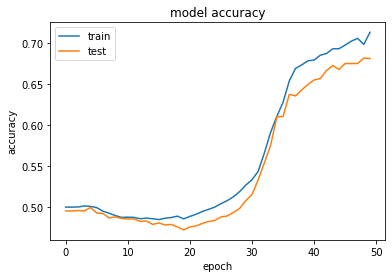

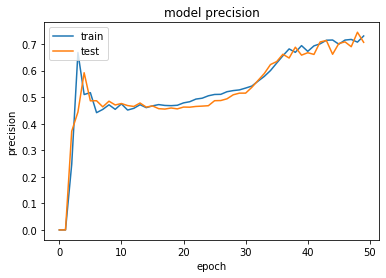

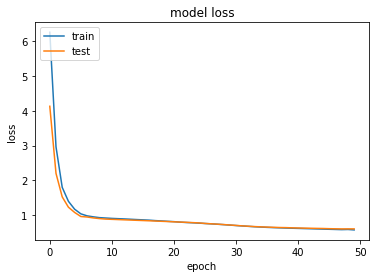

tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fn
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fn
Train on 14850 samples, validate on 1650 samples
Epoch 1/100
14850/14850 [==============================] - 43s 3ms/step - loss: 0.6783 - accuracy: 0.6015 - precision: 0.7043 - recall: 0.1294 - f1_score: 0.2079 - val_loss: 0.6883 - val_accuracy: 0.6958 - val_precision: 0.7091 - val_recall: 0.7010 - val_f1_score: 0.7049
Epoch 2/100
   64/14850 [..............................] - ETA: 38s - loss: 0.6514 - accuracy: 0.6406 - precision: 0.9048 - rec

C:\Users\Ares\AppData\Roaming\Python\Python37\site-packages\keras\engine\saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


14850/14850 [==============================] - 42s 3ms/step - loss: 0.6089 - accuracy: 0.6882 - precision: 0.7820 - recall: 0.4769 - f1_score: 0.5915 - val_loss: 0.6423 - val_accuracy: 0.7018 - val_precision: 0.6976 - val_recall: 0.7643 - val_f1_score: 0.7292
Epoch 3/100
14850/14850 [==============================] - 42s 3ms/step - loss: 0.5617 - accuracy: 0.7207 - precision: 0.7298 - recall: 0.6940 - f1_score: 0.7113 - val_loss: 0.5757 - val_accuracy: 0.7194 - val_precision: 0.7415 - val_recall: 0.7186 - val_f1_score: 0.7295
Epoch 4/100
14850/14850 [==============================] - 42s 3ms/step - loss: 0.5389 - accuracy: 0.7327 - precision: 0.7267 - recall: 0.7069 - f1_score: 0.7167 - val_loss: 0.5505 - val_accuracy: 0.7261 - val_precision: 0.7248 - val_recall: 0.7556 - val_f1_score: 0.7395
Epoch 5/100
14850/14850 [==============================] - 42s 3ms/step - loss: 0.5216 - accuracy: 0.7445 - precision: 0.7479 - recall: 0.7316 - f1_score: 0.7395 - val_loss: 0.5534 - val_accuracy:

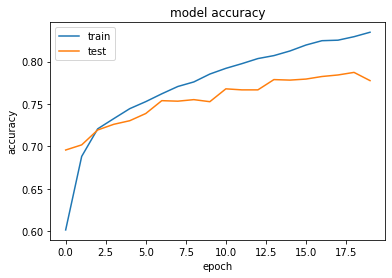

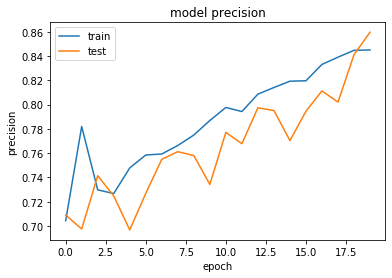

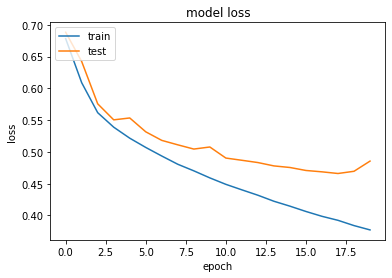

tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fn
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fn
Train on 14850 samples, validate on 1650 samples
Epoch 1/100
14850/14850 [==============================] - 63s 4ms/step - loss: 0.6795 - accuracy: 0.6185 - precision: 0.5812 - recall: 0.4659 - f1_score: 0.5014 - val_loss: 0.6820 - val_accuracy: 0.5018 - val_precision: 0.5065 - val_recall: 0.9703 - val_f1_score: 0.6654
Epoch 2/100


C:\Users\Ares\AppData\Roaming\Python\Python37\site-packages\keras\engine\saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


14850/14850 [==============================] - 62s 4ms/step - loss: 0.5642 - accuracy: 0.7201 - precision: 0.7630 - recall: 0.6254 - f1_score: 0.6869 - val_loss: 0.6117 - val_accuracy: 0.7194 - val_precision: 0.7125 - val_recall: 0.7468 - val_f1_score: 0.7292
Epoch 3/100
14850/14850 [==============================] - 63s 4ms/step - loss: 0.5244 - accuracy: 0.7466 - precision: 0.7628 - recall: 0.7155 - f1_score: 0.7383 - val_loss: 0.5573 - val_accuracy: 0.7315 - val_precision: 0.6973 - val_recall: 0.8257 - val_f1_score: 0.7560
Epoch 4/100
14850/14850 [==============================] - 62s 4ms/step - loss: 0.5051 - accuracy: 0.7592 - precision: 0.7713 - recall: 0.7342 - f1_score: 0.7522 - val_loss: 0.5302 - val_accuracy: 0.7376 - val_precision: 0.7779 - val_recall: 0.7005 - val_f1_score: 0.7371
Epoch 5/100
14850/14850 [==============================] - 62s 4ms/step - loss: 0.4848 - accuracy: 0.7692 - precision: 0.7798 - recall: 0.7440 - f1_score: 0.7612 - val_loss: 0.5196 - val_accuracy:

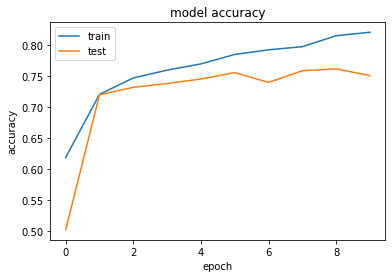

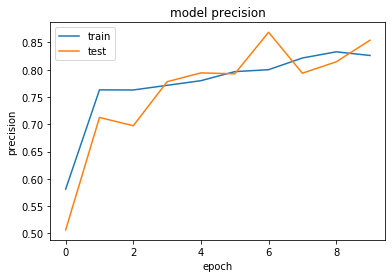

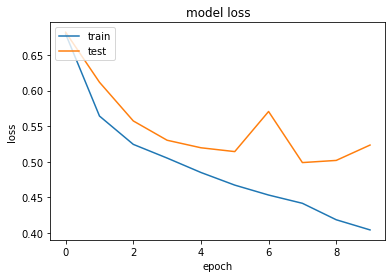

In [ ]:
if __name__ == '__main__':  

  # BiLSTM
  bilstm = createLSTM()
  train(bilstm, train_data)

  #CNN light
  cnn = createCNN()
  train(cnn, train_data)

  #CNN ALexandre no weights
  model = create_model()
  train(model, train_data)
  # test_model(model, test_data)
  # model.save("model_test_full_2.h5")


In [ ]:
def test_print(model, data):
  # for i, ds in enumerate(data):
    x_test = np.array(test_data[3])
    y_test = np.array(test_data[2])

    preds = model.predict_on_batch(x_test)
    preds = [1 if preds[i][0] > 0.5 else 0 for i in range(preds.shape[0])]
    # print(preds)
    # print(test_data[2])
    tp_ = tp(preds, y_test)
    fp_ = fp(preds, y_test)
    fn_ = fn(preds, y_test)
    tn_ = tn(preds, y_test)
    a = accuracy(tp_, tn_, fp_, fn_)
    p = precision(tp_, fp_)
    r = recall(tp_, fn_)
    f1 = f1_score(p, r)

    p_n = precision_negative(tn_, fn_)
    r_n = recall_negative(tn_, fp_)
    f1_n = f1_score(p_n, r_n)

    print(f"tp: {tp_}, nb_pos: {len([1 for y in y_test if y == 1])}")
    print(f"tn: {tn_}, nb_neg: {len([1 for y in y_test if y == 0])}")
    print(f"fp: {fp_}, nb_pos: {len([1 for y in y_test if y == 1])}")
    print(f"fn: {fn_}, nb_neg: {len([1 for y in y_test if y == 0])}")
    print(f"accuracy: {a} ")
    print('positives')
    print(f"precision: {p}, recall: {r}, f1: {f1}")
    print('negatives')
    print(f"precision: {p_n}, recall: {r_n}, f1: {f1_n}")

print("BiLSTM")
test_print(bilstm, test_data)
print("CNN")
test_print(cnn, test_data)
print("CNN Alexandre")
test_print(model, test_data)


BiLSTM
tp: 330, nb_pos: 500
tn: 359, nb_neg: 500
fp: 141, nb_pos: 500
fn: 170, nb_neg: 500
accuracy: 0.689 
positives
precision: 0.7006369426751592, recall: 0.66, f1: 0.6797116374871267
negatives
precision: 0.6786389413988658, recall: 0.718, f1: 0.6977648202137998
CNN
tp: 331, nb_pos: 500
tn: 455, nb_neg: 500
fp: 45, nb_pos: 500
fn: 169, nb_neg: 500
accuracy: 0.786 
positives
precision: 0.8803191489361702, recall: 0.662, f1: 0.7557077625570776
negatives
precision: 0.7291666666666666, recall: 0.91, f1: 0.8096085409252669
CNN Alexandre
tp: 307, nb_pos: 500
tn: 459, nb_neg: 500
fp: 41, nb_pos: 500
fn: 193, nb_neg: 500
accuracy: 0.766 
positives
precision: 0.882183908045977, recall: 0.614, f1: 0.7240566037735849
negatives
precision: 0.7039877300613497, recall: 0.918, f1: 0.796875
